In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

## Процесс свертки

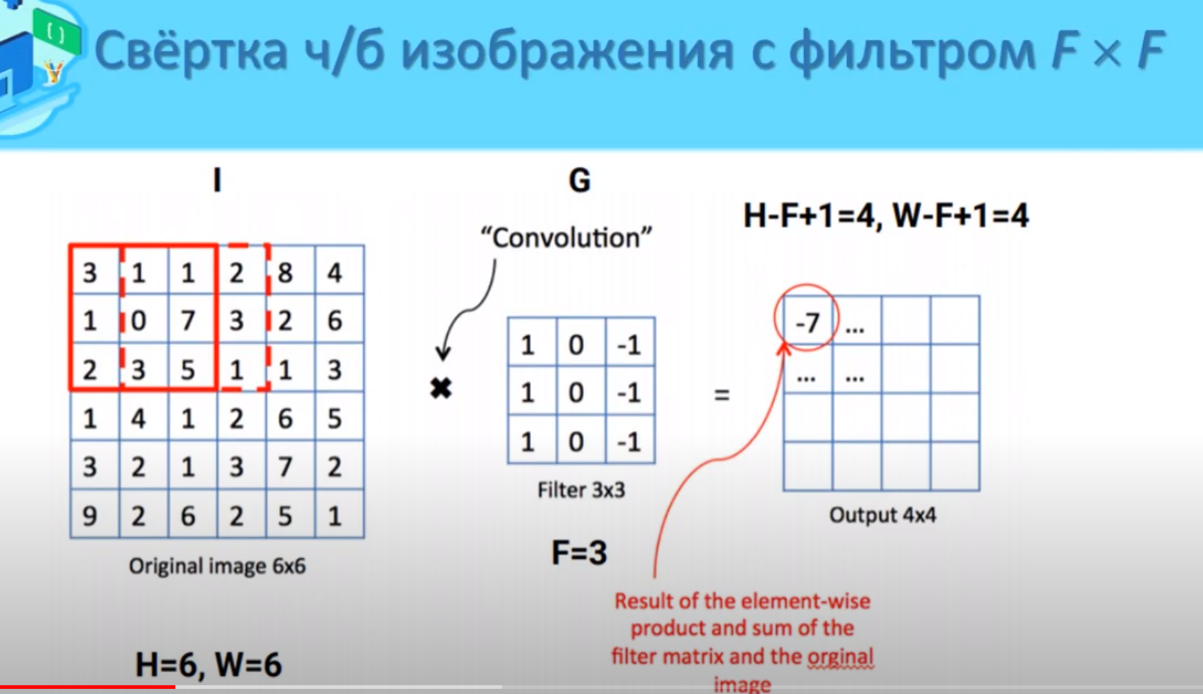

Свертка цветного изображения

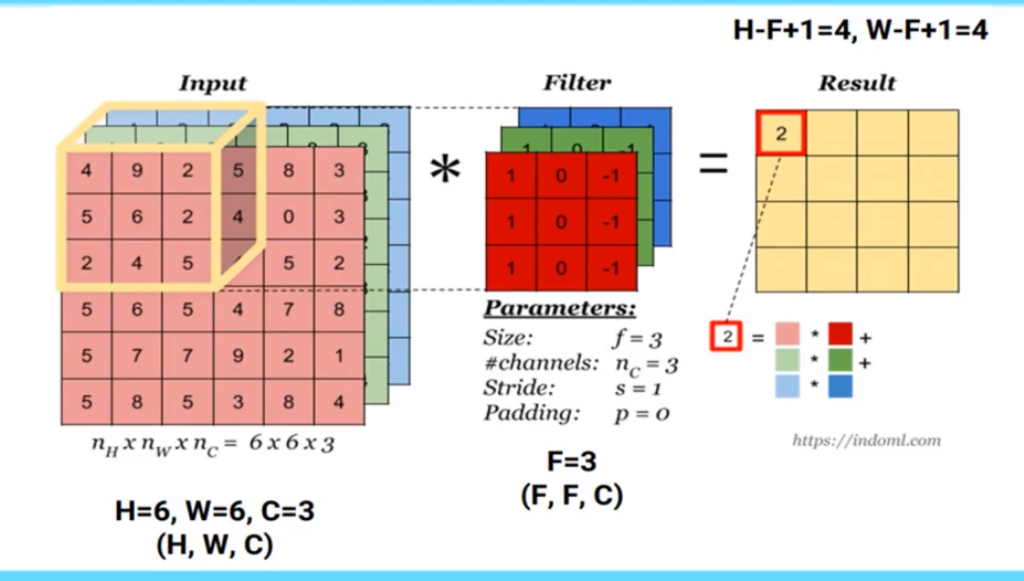

Шаг свертки

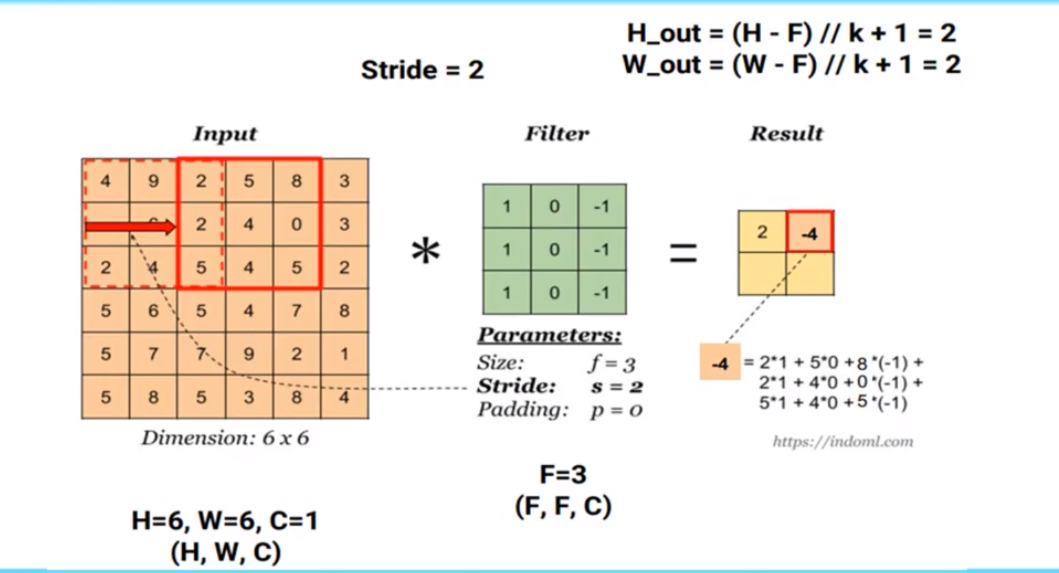

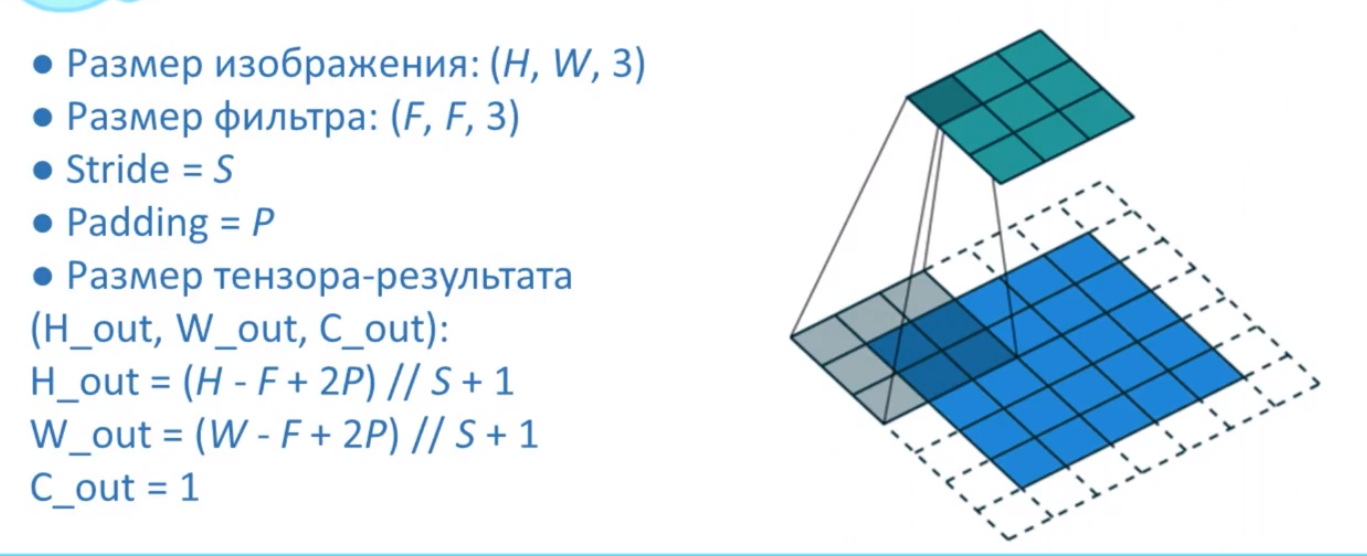

In [32]:
print(3 * ((400 - 10 + 1) // 3 + 1) * ((400 - 7 + 1) // 3 + 1))

print(((109 - 10 + 2) // 2 + 1), ((400 - 10 + 2) // 2 + 1))

51876
51 197


In [36]:
print(((54 - 3 + 2) // 1 + 1))

54


In [25]:
print((97 - 3 + 2) // 2 + 1)

49


In [ ]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        # На вход изображение 3х400х400
        # Первый слой свертки, делаем 16 фильтров с размером ядра 5 и падингом 1
        self.conv1 = nn.Conv2d(3, 16, kernel_size=7, padding=1, stride=3)
        # C - кол-во каналов, H, W - высота и ширина
        # F - размер свертки (просматриваемая область) - 5
        # Получаем на выходе размер 16 * ((400 - 5 + 2) // 3 + 1) * ((400 - 5 + 2) // 3 + 1)
        print(3 * ((400 - 7 + 2) // 3 + 1) * ((400 - 7 + 2) // 3 + 1))
        # 16 * 132 * 132
        self.conv2 = nn.Conv2d(16, 24, kernel_size=5, padding=1, stride=2)
        # 24 * 65 * 65
        self.conv3 = nn.Conv2d(24, 12, kernel_size=3, padding=3, stride=1)
        # 12 * 64 * 64
        
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # 12  * 32 * 32
        
        # self.norm2 = nn.BatchNorm2d(64)
        
        self.fc1 = nn.Linear(12 * 32 * 32, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = nn.functional.relu(x)
        # x = self.pool(x)
        x = self.conv2(x)
        x = nn.functional.relu(x)
        x = self.conv3(x)
        x = nn.functional.relu(x)
        x = self.pool(x)
        x = x.view(-1, 12 * 32 * 32)
        x = self.fc1(x)
        x = self.fc2(x)
        return x

In [ ]:
class MonkeyModel(nn.Module):
    def __init__(self):
        super(MonkeyModel, self).__init__()
        # На вход изображение 3х400х400
        # Первый слой свертки, делаем 16 фильтров с размером ядра 5 и падингом 1
        self.conv1 = nn.Conv2d(3, 32, kernel_size=10, padding=1, stride=2)
        # C - кол-во каналов, H, W - высота и ширина
        # F - размер свертки (просматриваемая область) - 5
        # Получаем на выходе размер 16 * ((400 - 5 + 2) // 3 + 1) * ((400 - 5 + 2) // 3 + 1)
        print(3 * ((400 - 7 + 2) // 3 + 1) * ((400 - 7 + 2) // 3 + 1))
        # 32 * 197 * 197
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5, padding=1, stride=2)
        # 64 * 98 * 98
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, padding=1, stride=2)
        # 64 * 49 * 49
        
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # 64 * 24 * 24
        
        # self.norm2 = nn.BatchNorm2d(64)
        
        self.fc1 = nn.Linear(64 * 24 * 24, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.conv1(x)
        # print(f"После прохода через 1 слой: {x.size()}")
        x = nn.functional.relu(x)
        # x = self.pool(x)
        x = self.conv2(x)
        # print(f"После прохода через 2 слой: {x.size()}")
        x = nn.functional.relu(x)
        x = self.conv3(x)
        nn.functional.log_softmax
        # print(f"После прохода через 3 слой: {x.size()}")
        x = nn.functional.relu(x)
        x = self.pool(x)
        # print(f"После пулинга: {x.size()}")
        x = x.view(-1, 64 * 24 * 24)
        x = self.fc1(x)
        x = self.fc2(x)
        return x

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = MonkeyModel().to(device)
